In [2]:
import numpy as np

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [4]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [10]:
svm_reg.dual

True

In [36]:
# -------- Ex 8
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C=5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", eta0=0.001, alpha=alpha, max_iter=100, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC: ", lin_clf.intercept_, lin_clf.coef_)
print("SVM: ", svm_clf.intercept_, svm_clf.coef_)
print("SGD: ", sgd_clf.intercept_, sgd_clf.coef_)



LinearSVC:  [0.28474027] [[1.0536456  1.09903032]]
SVM:  [0.31896852] [[1.1203284  1.02625193]]
SGD:  [0.30628707] [[1.1788551  1.06351567]]


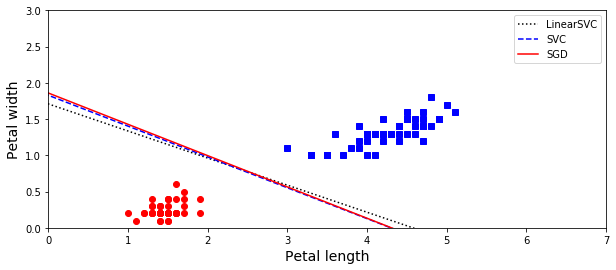

In [103]:
import matplotlib.pyplot as plt

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(10,4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGD")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "ro")

plt.axis([0, 7, 0, 3])

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.legend()
plt.show()

In [104]:
np.random.permutation(6)

array([5, 4, 1, 2, 0, 3])

In [109]:
# ------- MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)


In [153]:
np.random.seed(42)
rnd_idx = np.random.permutation(60000)

X_train = mnist["data"][:60000][rnd_idx]
X_test = mnist["data"][60000:]

y_train = mnist["target"][:60000][rnd_idx]
y_test = mnist["target"][60000:]

In [154]:
lin_clf = LinearSVC(random_state = 42)
lin_clf.fit(X_train, y_train)

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [156]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [158]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9119

In [164]:
svc_clf = SVC(decision_function_shape="ovr", gamma="auto")
svc_clf.fit(X_train_scaled[:10000], y_train[:10000])
y_pred = svc_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9416

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distribution = {"gamma": reciprocal(0.001, 0.1), "C":uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc_clf, param_distributions=param_distribution, cv=3, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=5.248206329354602, gamma=0.0012679495035389098 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=5.248206329354602, gamma=0.0012679495035389098, total=   0.7s
[CV] C=5.248206329354602, gamma=0.0012679495035389098 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] . C=5.248206329354602, gamma=0.0012679495035389098, total=   0.6s
[CV] C=5.248206329354602, gamma=0.0012679495035389098 ................
[CV] . C=5.248206329354602, gamma=0.0012679495035389098, total=   0.7s
[CV] C=2.273002361324145, gamma=0.0015577284706445767 ................
[CV] . C=2.273002361324145, gamma=0.0015577284706445767, total=   0.7s
[CV] C=2.273002361324145, gamma=0.0015577284706445767 ................
[CV] . C=2.273002361324145, gamma=0.0015577284706445767, total=   0.7s
[CV] C=2.273002361324145, gamma=0.0015577284706445767 ................
[CV] . C=2.273002361324145, gamma=0.0015577284706445767, total=   0.7s
[CV] C=1.4631693914665058, gamma=0.00918319995193482 .................
[CV] .. C=1.4631693914665058, gamma=0.00918319995193482, total=   0.9s
[CV] C=1.4631693914665058, gamma=0.00918319995193482 .................
[CV] .. C=1.4631693914665058, gamma=0.00918319995193482, total=   0.9s
[CV] C=1.4631693914665058, gamma=0.00918319995193482 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   25.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto', kernel='rbf',
                                 max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF1ACDDEF0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF1AD27438>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [175]:
rnd_search_cv.best_estimator_

SVC(C=5.248206329354602, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0012679495035389098,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [176]:
rnd_search_cv.best_score_

0.864

In [177]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.248206329354602, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0012679495035389098,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [178]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9718

In [182]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [184]:
from sklearn.svm import LinearSVR, SVR

lin_svr = LinearSVR()
lin_svr.fit(X_train_scaled, y_train)

y_pred = lin_svr.predict(X_test_scaled)


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [188]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

1.2056273830931126

In [189]:
param_distribution = {"gamma":reciprocal(0.001, 0.1), "C":uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions=param_distribution, cv=3, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.612278302281492, gamma=0.00114890343902 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=7.612278302281492, gamma=0.00114890343902, total=   4.1s
[CV] C=7.612278302281492, gamma=0.00114890343902 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ...... C=7.612278302281492, gamma=0.00114890343902, total=   4.1s
[CV] C=7.612278302281492, gamma=0.00114890343902 .....................
[CV] ...... C=7.612278302281492, gamma=0.00114890343902, total=   4.2s
[CV] C=9.380539483285983, gamma=0.0696611062643859 ...................
[CV] .... C=9.380539483285983, gamma=0.0696611062643859, total=   5.9s
[CV] C=9.380539483285983, gamma=0.0696611062643859 ...................
[CV] .... C=9.380539483285983, gamma=0.0696611062643859, total=   5.7s
[CV] C=9.380539483285983, gamma=0.0696611062643859 ...................
[CV] .... C=9.380539483285983, gamma=0.0696611062643859, total=   5.7s
[CV] C=6.970364898591746, gamma=0.05801763234329911 ..................
[CV] ... C=6.970364898591746, gamma=0.05801763234329911, total=   5.0s
[CV] C=6.970364898591746, gamma=0.05801763234329911 ..................
[CV] ... C=6.970364898591746, gamma=0.05801763234329911, total=   5.1s
[CV] C=6.970364898591746, gamma=0.05801763234329911 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF308939E8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF30893668>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [190]:
rnd_search_cv.best_estimator_

SVR(C=9.380539483285983, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.0696611062643859, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [191]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_pred, y_test)
np.sqrt(mse)

0.5632507181653958